
# Classification

In this chapter, you will be introduced to classification problems and learn how to solve them using supervised learning techniques. Classification problems are prevalent in a variety of domains, ranging from finance to healthcare. Here, you will have the chance to apply what you are learning to a political dataset, where you classify the party affiliation of United States Congressmen based on their voting records.

## Supervised Learning

## What is machine learning?
- ● The art and science of:
- ● Giving computers the ability to learn to make decisions from data
- ● … without being explicitly programmed!
- ● Examples:
- ● Learning to predict whether an email is spam or not
- ● Clustering wikipedia entries into different categories
- ● Supervised learning: Uses labeled data
- ● Unsupervised learning: Uses unlabeled data

## Unsupervised learning
- ● Uncovering hidden pa"erns from unlabeled data
● Example:
- ● Grouping customers into distinct categories (Clustering)


## Reinforcement learning
- ● So#ware agents interact with an environment
    - Learn how to optimize their behavior
     - Given a system of rewards and punishments
    - Draws inspiration from behavioral psychology
- Applications
    - Economics
    - Genetics
    - Game playing
- AlphaGo: First computer to defeat the world champion in Go


## Suvervised learning
- Predictor variable/ featires and target variable
# Aim  Predict the target variable, given the predictor variables
    - Classification: Target variable consit of categories
    - Regression: target valriabels is continous.
    
 ex: Predictor variables: sepal lengh width, petal leng...
 Target variable: species
 
### Naming conventions

#### Features $=$ predictor variables $=$ independent variables
#### Target variable $=$ dependent variable$=$ response variable

### Supervised learning
- automate time-consuming or expensive manual tasks
    - ex: doctor's diagnosis
- Make predictions about the future
    - ex: will acustomer click on an add or not?
- Need labeled data
    - Historical data with labels
    - experimetns to get labeled data
    - crowd-sourcing labeled data

#  Exploratory data analysis

## The Iris dataset

### Features
- Petal lenght
- Petal width
- Sepal lenght
- Sepal width

## Target variable: Species
- Versicolor
- Virginica
- Setosa


## Iris dataset in scikit-learn

In [1]:
#!pip install sklearn

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
iris = datasets.load_iris()

#### Bunch its like a python dictionary

In [4]:
type(iris)

sklearn.utils.Bunch

`sklearn.utils.Bunch`
#### keys
- data: values of the features
- target: target data
- target_names: 
- DESCR: Description of the dataset
- feature_names: column names

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
type(iris.data)

numpy.ndarray

In [7]:
type(iris.target)

numpy.ndarray

# samples are in rows
# features are in columns

In [8]:
iris.data.shape  # 150 rows and 4 columns

(150, 4)

In [9]:
iris.target.shape

(150,)

- setosa: 0
- versicolor: 1
- virginica : 2

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Exploratory data analysis (EDA)

In [12]:
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Visual EDA

/home/salas/miniconda3/envs/datacamp/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


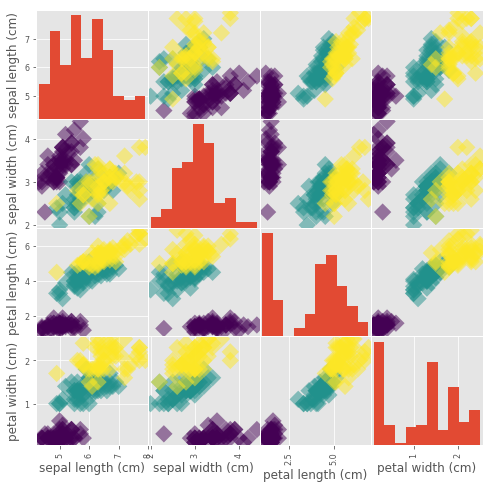

In [13]:
_ = pd.scatter_matrix(df,
                      figsize=[8,8],
                      c=y,
                      s=150,
                      marker = 'D')

# Let's practice

```
Possible Answers
The DataFrame has a total of 435 rows and 17 columns.

Except for 'party', all of the columns are of type int64.

The first two rows of the DataFrame consist of votes made by Republicans and the next three rows consist of votes made by Democrats.
press 3
- There are 17 predictor variables, or features, in this DataFrame.
The target variable in this DataFrame is 'party'.

```

Great work! The number of columns in the DataFrame is not equal to the number of features. One of the columns - 'party' is the target variable.

Visual EDA
The Numerical EDA you did in the previous exercise gave you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give you an even better understanding of the data. In the video, Hugo used the scatter_matrix() function on the Iris data for this purpose. However, you may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as Seaborn's countplot.

Given on the right is a countplot of the 'education' bill, generated from the following code:
```python
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()
```

In `sns.countplot()`, we specify the x-axis data to be 'education', and hue to be 'party'. Recall that 'party' is also our target variable. So the resulting plot shows the difference in voting behavior between the two parties for the 'education' bill, with each party colored differently. We manually specified the color to be 'RdBu', as the Republican party has been traditionally associated with red, and the Democratic party with blue.

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

In the IPython Shell, explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? Be sure to begin your plotting statements for each figure with plt.figure() so that a new figure will be set up. Otherwise, your plots will be overlayed onto the same figure.

In [14]:
cols = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

In [15]:
dfv = pd.read_csv('house-votes-84.csv',names=cols)
##### cleanup
for i in dfv.columns:
    if i == "party":
        pass
    else:
        dfv[i] = dfv[i].map({'y': 1, 'n': 0})
        
dfv = dfv.fillna(method='ffill')
dfv = dfv.fillna(method='bfill')

for i in dfv.columns:
    if i == "party":
        pass
    else:
        dfv[i] = dfv[i].astype('int')

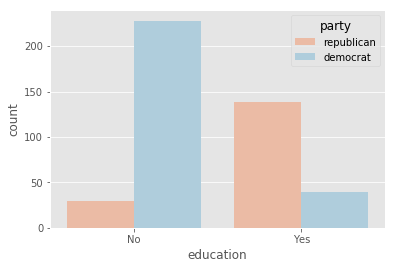

In [16]:
plt.figure()
sns.countplot(x='education', hue='party', data=dfv, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

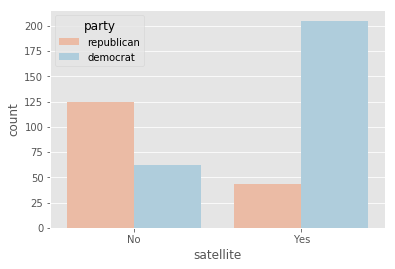

In [17]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=dfv, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

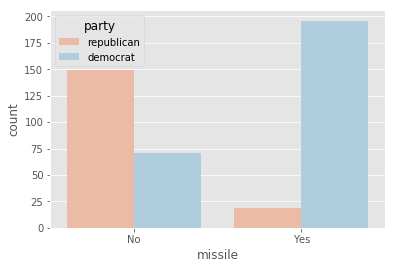

In [18]:
plt.figure()
sns.countplot(x='missile', hue='party', data=dfv, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# The classification Challenge

We have as et of labeled datga and we want to build a **classifier** that takes:
    - input:**unlabeled data**
    - output **label**
    
## Steps

- choose a type of classifier
- needs to learn from the already labeled data[TRAINING DATA]

## K-Nearest Neighbor
- predict the labels of a datapoint by:
    - looking at the 'k' closet labeled dtapoints
    - taking a majoritiy vote.
    

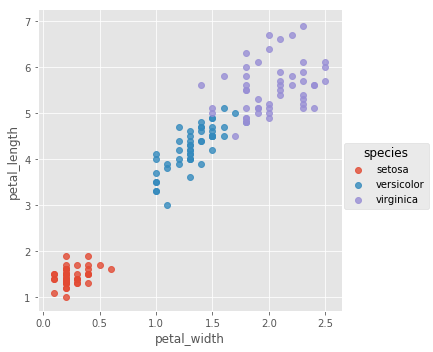

In [19]:
df = sns.load_dataset('iris')
sns.lmplot( x="petal_width", y="petal_length", data=df, fit_reg=False, hue='species', legend=True)

## Scikit-learn fit and predict
- All machine learning models implemented as Python classes
    - tehy implement the algorithm for learning and predicting
    - store the information leanred from teh data
- Training a model on teh data = 'fitting' a model to the data
    - `.fit()` method
- to predict the labels of new data: `predict()` method

## Using scikit-learn to fit a classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=6)

In [22]:
help(knn.fit)

Help on method fit in module sklearn.neighbors.base:

fit(X, y) method of sklearn.neighbors.classification.KNeighborsClassifier instance
    Fit the model using X as training data and y as target values
    
    Parameters
    ----------
    X : {array-like, sparse matrix, BallTree, KDTree}
        Training data. If array or matrix, shape [n_samples, n_features],
        or [n_samples, n_samples] if metric='precomputed'.
    
    y : {array-like, sparse matrix}
        Target values of shape = [n_samples] or [n_samples, n_outputs]



In [23]:
X = iris['data']  #features, must be continous values and not categories, no missing values in data
y = iris['target']# target


knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [24]:
X.shape

(150, 4)

In [25]:
y.shape

(150,)

### Predicting on unlabeled data

```python
prediction = knn.predict(X_new) # X_new is a new var

x_new.shape

(3,4)  # 3 observations and 4 features

print('Prediction {}'.format(prediction))

[1 1 0]
```

# Let's practice

## k-Nearest Neighbors: Fit

Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame `df`.

In the video, Hugo discussed the importance of ensuring your data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array `X` and response variable `y`: This is in accordance with the common scikit-learn practice.

Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the `n_neighbors` parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called `df`.

---
- Import `KNeighborsClassifier` from `sklearn.neighbors`.
- Create arrays `X` and `y` for the features and the target variable. Here this has been done for you. Note the use of `.drop()` to drop the target variable `'party'` from the feature array `X` as well as the use of the `.values` attribute to ensure `X` and `y` are NumPy arrays. Without using `.values`, `X` and `y` are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.
- Instantiate a `KNeighborsClassifier` called `knn` with `6` neighbors by specifying the `n_neighbors` parameter.
- Fit the classifier to the data using the `.fit()` method.

In [26]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = dfv['party'].values
X = dfv.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

### k-Nearest Neighbors: Predict

Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the `.predict()` method on the `X` that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

In the next video, Hugo will discuss a solution to this problem. For now, a random unlabeled data point has been generated and is available to you as `X_new`. You will use your classifier to predict the label for this new data point, as well as on the training data `X` that the model has already seen. Using `.predict()` on `X_new` will generate 1 prediction, while using it on `X` will generate 435 predictions: 1 for each sample.

The DataFrame has been pre-loaded as `df`. This time, you will create the feature array `X` and target variable array `y` yourself



INSTRUCTIONS
100XP
- Create arrays for the features and the target variable from df. As a reminder, the target variable is 'party'.
- Instantiate a `KNeighborsClassifier` with `6` neighbors.
- Fit the classifier to the data.
- Predict the labels of the training data, `X`.
- Predict the label of the new data point `X_new`.

In [27]:
# random array given by datacamp, create a datafame to match video
xnew = np.array([[ 0.27585481,  0.57973138,  0.22589613,  0.17094405,  0.95218152,
         0.98929183,  0.80777923,  0.59599303,  0.42763355,  0.71024087,
         0.26041508,  0.81899981,  0.89039443,  0.29320816,  0.94901142,
         0.56394409]])
X_new = pd.DataFrame(xnew)  # create df

In [28]:
X_new.shape

(1, 16)

In [29]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = dfv['party'].values
X = dfv.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


Great work! Did your model predict 'democrat' or 'republican'? How sure can you be of its predictions? In other words, how can you measure its performance? This is what you will learn in the next video.

---

# Measuring model performance
- in classification, accuracy is a commonly used metric

$$
\text{Accuracy} = \frac{\text{correct predictions}}{\text{Total number of data points}}
$$

- Whick data should be used to compute accuracy?
- how well will teh model perfomr on new data?

---

- could compute accuracy on data used to fit classifier
    - NOT indicative of ability to generalize
- split data into traini and test set
    - Fit/train teh classifier on teh trainin set
    - Make prediction on test set
    - compare predictions with the know labels

### Split data

- Training set: Train or fit the classifier
- Test set: Make predictions on the known labels



### STEPS

- `from sklearn.model_selection import train_test_split`
- use `train_test_split` to randomly split our data
    -  $X$: feature data
    -  $y$: target/labels
    - `test_size`:  what proportion of the origina data is used for the test.
    - `random_state`: sets a seed for the random number generator that splits the data into train and test ( SEED alows you to reproduce result
- `train_test_split`: returns
    - X_train: training data
    - X_test : test data
    - y_train: train labels
    - y_test : test labels
    
### Best practice



- $75\% \ \text{training data} \\ 25 \% \ \text{test data}$

Perform your split so that the split reflects the labels on your data, that is you want the labels to be distributed in  train and test sets as they are in the original dataset

To achive this,  we use the keyword argument `stratify = y`, where `y` is the list or array containing the **labels**





-  instatieat our KNN classifier `knn= KNeighborsClassifier(n_neighbors=8)`
- fit it to the training data `knn.fit(X_train, y_train)`
- Make our predictions on the test data `y_pred = knn.predict(X_test)`
- the prediction takes on 3 values


- check out the accuracy of our first model, use the `.score()` and pass `X_test` and `y_test`: `knn.score(X_test,y_test)`

In [30]:
from sklearn.model_selection import train_test_split
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,
                                                  random_state=21, stratify=y)

knn= KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Test set predicitons:\n {}'.format(y_pred))

Test set predicitons:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [31]:
knn.score(X_test,y_test)  # 95% is good for an out-of-the-box model !

0.9555555555555556

## Model complexity

#### larger $k$  $=$ smoother decission boudary $=$ less complex model
#### Smaller $k$ $=$ more complex model $=$ can lead to overfitting

![](https://i.imgur.com/yy0Vbu3.png)


- as $k$ increases, teh decision boundary gets smoother and less curvy, less complex model than a lower $k$
- complex models run teh risk of being sensitive to noise in the specific data that you have, rather thant reflecting genearl trands in the data. this is known as **OVERFITTING**
- if you increase$k$ even more and make the modle even simple, then the model will perform less well on both test and training sets.


### Model complexity curve
![](https://i.imgur.com/1UmpX5e.png)


# Let's practice

### The digits recognition dataset

Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?! In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range `0` to `16`, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type **Bunch, which are dictionary-like objects** 
Helpfully for the MNIST dataset, scikit-learn provides an `images` key in addition to the `data` and `target` keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this `images` key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the `.` notation, as in `digits.images`, or the `[]` notation, as in `digits['images']`.

For more on the MNIST data, check out this exercise in Part 1 of DataCamp's Importing Data in Python course. There, the full version of the MNIST dataset is used, in which the images are 28x28. It is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.

INSTRUCTIONS

- Import datasets from sklearn and `matplotlib.pyplot as plt`.
- Load the digits dataset using the `.load_digits()` method on datasets.
- Print the keys and `DESCR` of `digits`.
- Print the shape of images and data keys using the `.` notation.
- Display the 1010th image using `plt.imshow()`. This has been done for you, so hit 'Submit Answer' to see which handwritten digit this happens to be!

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

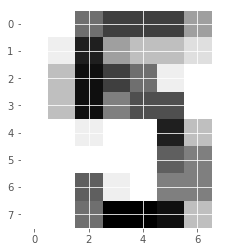

In [32]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

- Good job! It looks like the image in question corresponds to the digit '5'.
- Now, can you build a classifier that can make this prediction not only for this image, but for all the other ones in the dataset? You'll do so in the next exercise!

### Train/Test Split + Fit/Predict/Accuracy
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the `.score()` method.

INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
- Import KNeighborsClassifier from sklearn.neighbors and `train_test_split` from `sklearn.model_selection`.
- Create an array for the features using digits.data and an array for the target using `digits.target`.
- Create stratified training and test sets using `0.2` for the size of the test set. Use a random state of `42`. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
- Create a k-NN classifier with `7` neighbors and fit it to the training data.
- Compute and print the accuracy of the classifier's predictions using the `.score()` method.

In [33]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


Excellent work! 
- Incredibly, this out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy, and it did so in less than a second! 
- This is one illustration of how incredibly useful machine learning techniques can be.

---
### Overfitting and underfitting
Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of `k`, you will develop your intuition for overfitting and underfitting.

The training and testing sets are available to you in the workspace as `X_train`, `X_test`, `y_train`, `y_test`. In addition, `KNeighborsClassifier` has been imported from `sklearn.neighbors`.

INSTRUCTIONS
100XP
Inside the for loop:
- Setup a k-NN classifier with the number of neighbors equal to `k`.
- Fit the classifier with `k` neighbors to the training data.
- Compute accuracy scores the training set and test set separately using the `.score()` method and assign the results to the `train_accuracy` and `test_accuracy` arrays respectively.

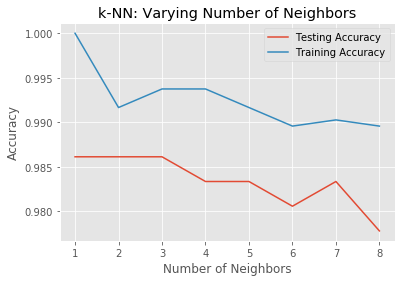

In [34]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Great work! 
- It looks like the test accuracy is highest when using 3 and 5 neighbors. 
- Using 8 neighbors or more seems to result in a simple model that underfits the data. 
- Now that you've grasped the fundamentals of classification, you will learn about regression in the next chapter!